***Canada per Capita Income Prediction Yearly***

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

**Reading data from csv file**

In [2]:
df=pd.read_csv("canada_per_capita_income.csv")
df.head(10)

,year,income_per_capita
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


**Now using scatter plot to plot per_capita_income over year***

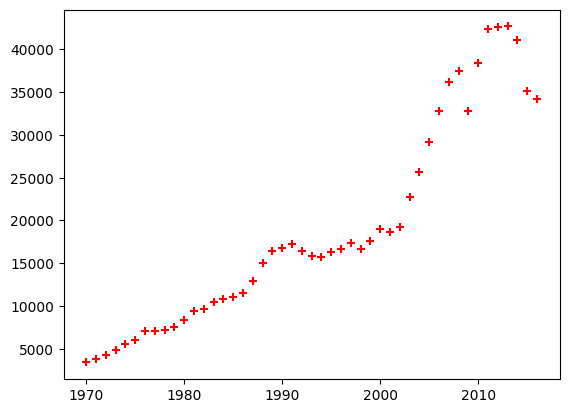

In [3]:
%matplotlib inline
plt.scatter(df["year"],df["income_per_capita"], color="red", marker="+")

**Now we will use Regression Model**

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']] , df.income_per_capita)

LinearRegression()

**As we know that y=mx+b**

**Where y is dependent variable in our case = per capita income (US$)**

**m is called coefficient (slope or gradient)**

**x is independent variable = year**

**b is called intercept**

***Let Print coef_ and intercept_ before prediction***

In [5]:
m=reg.coef_

In [6]:
b=reg.intercept_

***Now Predting for the year of 2020 mathematically***

In [7]:
income2020= (m*2020)+b
income2020

array([41288.69409442])

***Predicting for some years***

In [8]:
new_years = pd.DataFrame({'year': [2017,2018,2019,2020,2021,2022,2023,2024,2025]})
predicted_income = reg.predict(new_years)

print(predicted_income)

[38803.29886875 39631.76394397 40460.22901919 41288.69409442
 42117.15916964 42945.62424486 43774.08932009 44602.55439531
 45431.01947053]


***Now making a complete scatter plot***

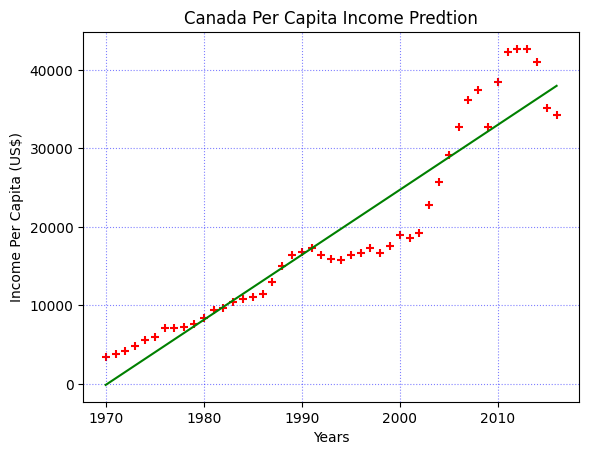

In [9]:
%matplotlib inline
plt.scatter(df["year"],df["income_per_capita"], color="red", marker="+")
plt.plot(df.year,reg.predict(df[['year']]), color="green")

plt.xlabel("Years")
plt.ylabel("Income Per Capita (US$)")
plt.title("Canada Per Capita Income Predtion")

plt.grid(color="blue", alpha=0.5, linestyle=":")

***Exporting a New CSV file containing the Predicted Income Per Capita of New Years***

In [10]:
income_per_capita =  pd.DataFrame({'income per capita':predicted_income})
income_per_capita=income_per_capita.round(decimals=0).astype(int)

In [11]:
new_csv=pd.concat([new_years,income_per_capita], axis=1)

In [12]:
new_csv

,year,income per capita
0,2017,38803
1,2018,39632
2,2019,40460
3,2020,41289
4,2021,42117
5,2022,42946
6,2023,43774
7,2024,44603
8,2025,45431


In [13]:
new_csv.to_csv("New Years Income Prediction Per Capita Canada")

In [14]:
df=pd.read_csv("New Years Income Prediction Per Capita Canada")
df

,Unnamed: 0,year,income per capita
0,0,2017,38803
1,1,2018,39632
2,2,2019,40460
3,3,2020,41289
4,4,2021,42117
5,5,2022,42946
6,6,2023,43774
7,7,2024,44603
8,8,2025,45431


***Note***

**This is the basic tutorial of simple linear regression**

**In this we have not minimize the error as we have to minimize MSE for better prediction**

**Anyone can easily determine by predicting the income of the trained data year e.g for 1975 so we can see that the actual income and predicted income are not same. So this is not the well trained model for predicting income. More advance topic will cover later to produce a good model for prediction**

***---------------------------------------------------------------------------------------------------------------------------------------***

***Saving Model Using sklearn and pickle***

**1 - Pickle**

In [15]:
import pickle

**Saving Model** 

*As our model is `reg`, which we use for prediction so we are using this to save*

In [24]:
with open ('pickle_model','wb') as f:
    pickle.dump(reg,f)

**Importing Model to use**

In [25]:
with open('pickle_model','rb') as f:
    mp=pickle.load(f)

In [26]:
n = pd.DataFrame({'year': [1979]})

In [27]:
mp.predict(n)

array([7321.62601029])

***2 - Sklearn***

In [28]:
import joblib

In [31]:
joblib.dump(reg,'model_jl')

['model_jl']

***Loading Model***

In [32]:
mj=joblib.load('model_jl')

In [34]:
mj.coef_

array([828.46507522])

In [38]:
mj.predict([[1979]])

C:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7321.62601029])